## Stock prices prediction

The main purpose of this project is to predict stock prices using [Yahoo's API](https://pypi.org/project/yfinance/).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data

In [25]:
import yfinance as yf

# Companies I choosed to analyse are: Google - GOOGL and Microsoft - MSFT.
googl = yf.Ticker('GOOGL')
msft = yf.Ticker('MSFT')
history_googl = googl.history(period='max')
history_msft = msft.history(period='max')

Saving the data to reuse it in the future

In [26]:
history_googl.reset_index().to_csv('data/googl.csv')
history_msft.reset_index().to_csv('data/msft.csv')

In [281]:
data_ggl = pd.read_csv('data/googl.csv').drop('Unnamed: 0', axis=1)
data_ggl.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0.0,0.0
1,2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0.0,0.0
2,2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0.0,0.0
3,2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0.0,0.0
4,2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0.0,0.0


In [282]:
data_msft = pd.read_csv('data/msft.csv').drop('Unnamed: 0', axis=1)
data_msft.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13 00:00:00-05:00,0.055004,0.063093,0.055004,0.060396,1031788800,0.0,0.0
1,1986-03-14 00:00:00-05:00,0.060396,0.063632,0.060396,0.062553,308160000,0.0,0.0
2,1986-03-17 00:00:00-05:00,0.062553,0.064172,0.062553,0.063632,133171200,0.0,0.0
3,1986-03-18 00:00:00-05:00,0.063632,0.064172,0.061475,0.062014,67766400,0.0,0.0
4,1986-03-19 00:00:00-05:00,0.062014,0.062553,0.060396,0.060936,47894400,0.0,0.0


In [14]:
data_ggl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4819 non-null   object 
 1   Open          4819 non-null   float64
 2   High          4819 non-null   float64
 3   Low           4819 non-null   float64
 4   Close         4819 non-null   float64
 5   Volume        4819 non-null   int64  
 6   Dividends     4819 non-null   float64
 7   Stock Splits  4819 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 301.3+ KB


In [15]:
data_msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9471 non-null   object 
 1   Open          9471 non-null   float64
 2   High          9471 non-null   float64
 3   Low           9471 non-null   float64
 4   Close         9471 non-null   float64
 5   Volume        9471 non-null   int64  
 6   Dividends     9471 non-null   float64
 7   Stock Splits  9471 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 592.1+ KB


In [283]:
data_ggl['Date'] = pd.to_datetime(data_ggl.Date, utc=True)
data_msft['Date'] = pd.to_datetime(data_msft.Date, utc=True)

### EDA

Let's print a line plot of each of the stocks we have during all period of time

Text(0.5, 1.0, 'Microsoft')

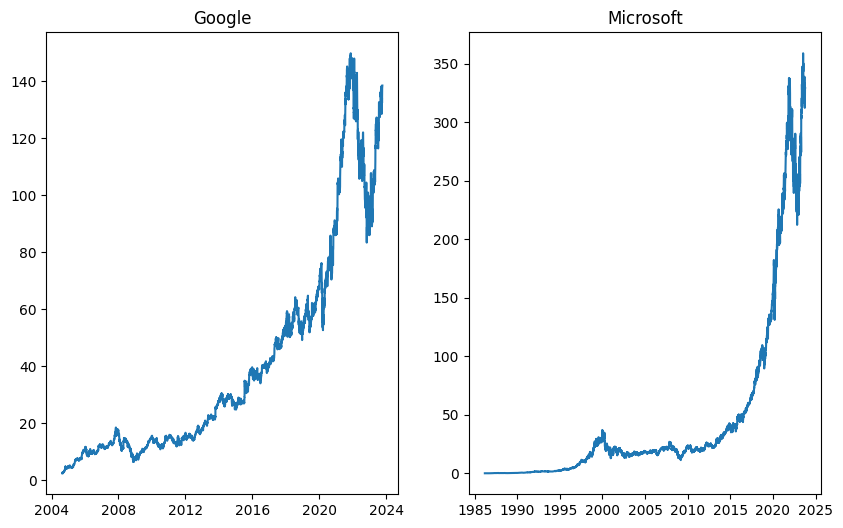

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(10)
ax[0].plot(data_ggl.Date, data_ggl.Close)
ax[0].set_title('Google')
ax[1].plot(data_msft.Date, data_msft.Close)
ax[1].set_title('Microsoft')

And now we can also draw the Volume line to check for any similar trends.

As the internet says Volume of a stock is the number of shares traded in a given period. Traders and investors use this metric to gauge the interest in a security to help them make trading decisions.

Text(0.5, 1.0, 'Microsoft')

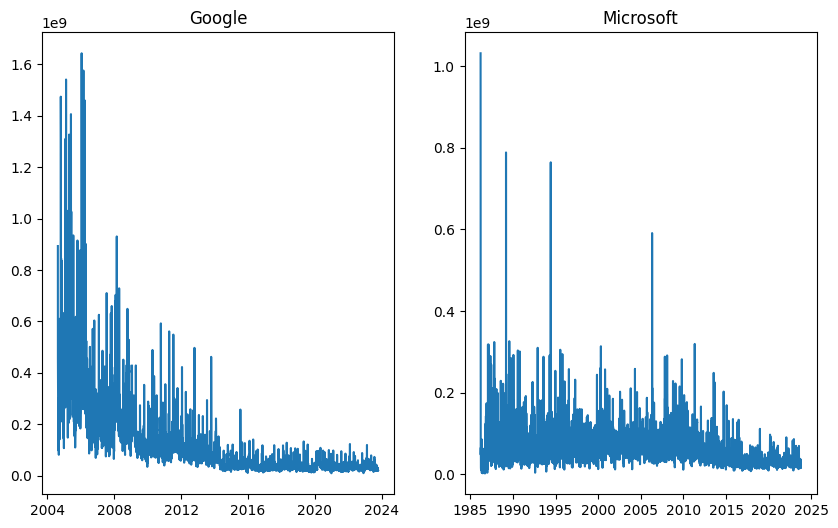

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(10)
ax[0].plot(data_ggl.Date, data_ggl.Volume)
ax[0].set_title('Google')
ax[1].plot(data_msft.Date, data_msft.Volume)
ax[1].set_title('Microsoft')

In [67]:
ggl_close_volume_corr = data_ggl.corr().loc['Close', 'Volume']
msft_close_volume_corr = data_msft.corr().loc['Close', 'Volume']
print(f"The correlation between close price and volume in Google is: {ggl_close_volume_corr}")
print(f"The correlation between close price and volume in Microsoft is: {msft_close_volume_corr}")

The correlation between close price and volume in Google is: -0.46535834882388766
The correlation between close price and volume in Microsoft is: -0.33098028769785753


From the graphs above I can conclude that the volume of these two particular stocks doesn't give us any significant relationships with their trends. In the case of Google we can even see negative correlation between the volume and close price.

<Axes: title={'center': 'Microsoft'}, xlabel='Dividends', ylabel='Close'>

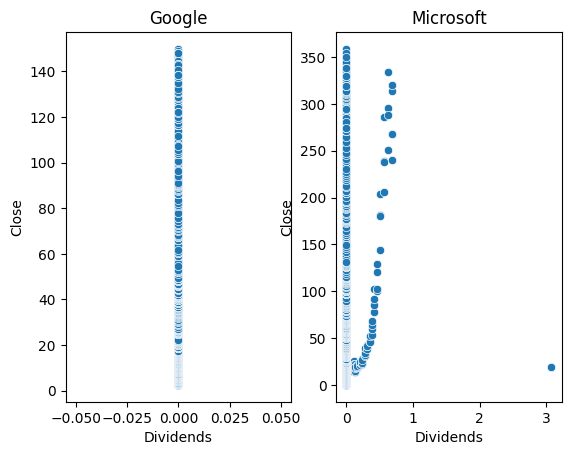

In [284]:
plt.subplot(121)
plt.title('Google')
sns.scatterplot(data=data_ggl, x='Dividends', y='Close')

plt.subplot(122)
plt.title('Microsoft')
sns.scatterplot(data=data_msft, x='Dividends', y='Close')

In [62]:
data_msft.Dividends.value_counts()

Dividends
0.00    9392
0.13       8
0.08       6
0.16       5
0.36       4
0.62       4
0.56       4
0.51       4
0.46       4
0.42       4
0.39       4
0.28       4
0.31       4
0.23       4
0.20       4
0.11       4
0.10       4
0.68       4
0.09       3
3.08       1
Name: count, dtype: int64

Dividends doesn't have the significant impact on stock price because the majority of observations have zero values there

<Axes: title={'center': 'Microsoft'}, xlabel='Stock Splits', ylabel='Close'>

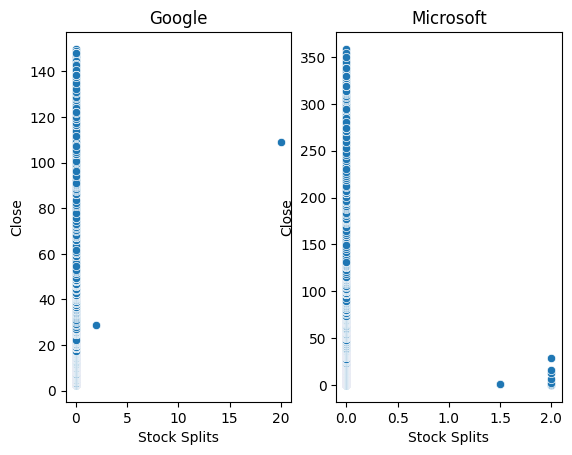

In [286]:
plt.subplot(121)
plt.title('Google')
sns.scatterplot(data=data_ggl, y='Close', x='Stock Splits')

plt.subplot(122)
plt.title('Microsoft')
sns.scatterplot(data=data_msft, y='Close', x='Stock Splits')

In [66]:
data_msft['Stock Splits'].value_counts()

Stock Splits
0.0    9462
2.0       7
1.5       2
Name: count, dtype: int64

Stock splits also doesn't have the significant impact on price with the same reason

In [70]:
data_ggl.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

So, from the information above I can conclude that in order to predict the stock prices I can leave the Date (for time series analysis), Close price as a target and a Volume because of its influence on the price.

Predic the close price based on the other variables like 'Open', 'High' and 'Low' would be very naive because their defenition and could lead to the data leakage, so I'll delete them.

In [6]:
data_msft = data_msft.loc[:, ['Date', 'Volume', 'Close']].set_index('Date')
data_ggl = data_ggl.loc[:, ['Date', 'Volume', 'Close']].set_index('Date')

### Feature engineering

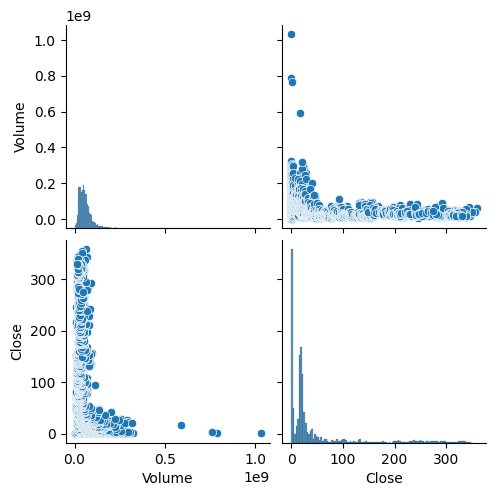

In [74]:
sns.pairplot(data=data_msft)

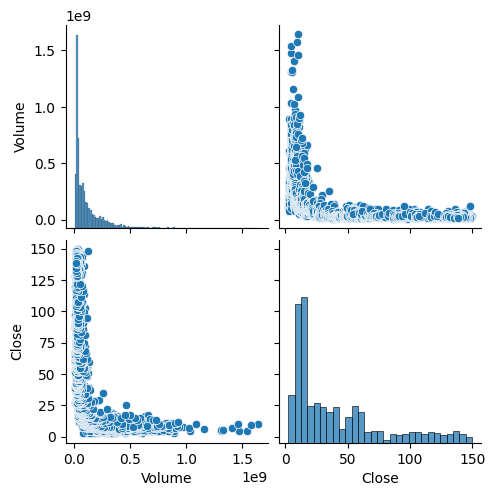

In [16]:
sns.pairplot(data=data_ggl)

Since the Volume variable has a log-normall distribution I will take the log of each observation to make them look more like normal.

In [287]:
data_msft.Volume = np.log(data_msft.Volume)
data_ggl.Volume = np.log(data_ggl.Volume)

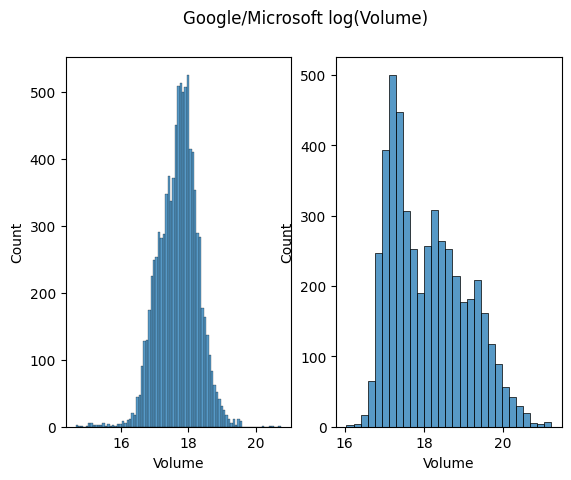

In [292]:
fig = plt.figure()
fig.suptitle("Google/Microsoft log(Volume)")
for i, data in enumerate([data_msft, data_ggl]):
    plt.subplot(1, 2, i+1)
    sns.histplot(data=data, x='Volume')

Now as these distributions look more like normal our future models will work with them easily.

### Autoregressive implementation

#### Additional feature engineering for linear regression

To correctly implement the linear regression model on time series we need either add __time-step__ or __lag__ features 

- __Time step__ features are just time indexes for each of the observations.

- __Lag__ features are the values of target variable on the previous day or other choosed period of time. 

In this case I'll choose lag features because I think that in combination with the Volume parameter this approach will give us a more interesting answers.

In [7]:
data_msft.columns = ['volume', 'target_price']
data_ggl.columns = ['volume', 'target_price']

To create lag features on these datasets we just need to shift target column by 1

In [ ]:
data_msft['prev_price'] = data_msft.target_price.shift(1).fillna(method='bfill')
data_ggl['prev_price'] = data_ggl.target_price.shift(1).fillna(method='bfill')

#### Modeling

Splitting the data on X and Y

In [8]:
X_ggl, y_ggl = data_ggl.drop('target_price', axis=1), data_ggl.loc[:, 'target_price']
X_msft, y_msft = data_msft.drop('target_price', axis=1), data_msft.loc[:, 'target_price']

In [11]:
# Train test split for Google
train_size = int(len(X_ggl)-len(X_ggl)*.2)
X_train_ggl, y_train_ggl = X_ggl[:train_size], y_ggl[:train_size]
X_test_ggl, y_test_ggl = X_ggl[train_size:], y_ggl[train_size:]

# Train test split for Microsoft
train_size = int(len(X_msft)-len(X_msft)*.2)
X_train_msft, y_train_msft = X_msft[:train_size], y_msft[:train_size]
X_test_msft, y_test_msft = X_msft[train_size:], y_msft[train_size:]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model_ggl = LinearRegression()
model_ggl.fit(X_train_ggl, y_train_ggl)
y_pred = model_ggl.predict(X_test_ggl)

print(f'MAE for linear regression: {mean_absolute_error(y_test_ggl, y_pred)}\n\
R2 score: {r2_score(y_test_ggl, y_pred)}')

MAE for linear regression: 1.5437998655947522
R2 score: 0.9929311332911219


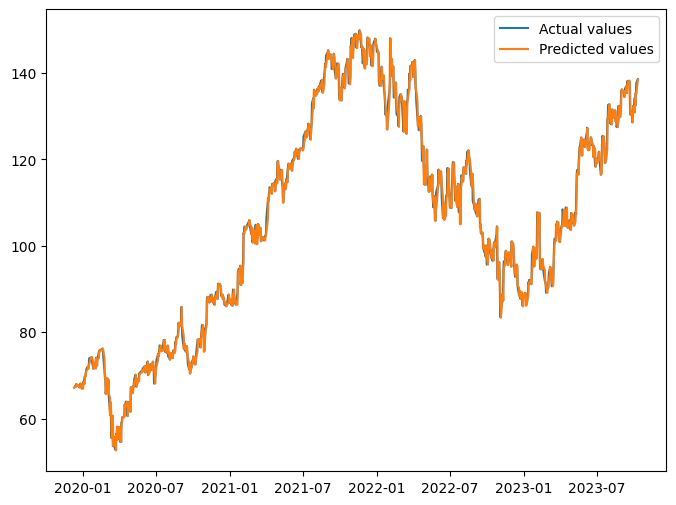

In [18]:
plt.figure(figsize=(8,6))
plt.plot(y_test_ggl.index, np.array(y_test_ggl), label="Actual values")
plt.plot(y_test_ggl.index, y_pred, label="Predicted values")
plt.legend()

From the chart above it seems like we found a pretty good approach, but we also should understand that this way to predict stock prices is good only when we need to predict the price on the next day knowing the today's value. If we'll try to use this approach on the bigger period of time the results will be worse.

In [55]:
long_time_preds = pd.DataFrame(data={
    'volume': X_test_ggl.volume.tolist(),
    'prev_price': [np.NAN for _ in range(len(X_test_ggl))]
})
long_time_preds['prev_price'][0] = X_train_ggl.iloc[-1, 1]
y_long_preds = []

In [ ]:
for index, row in long_time_preds.iterrows():
    if index != 0:
        row['prev_price'] = y_long_preds[-1]
    y_long_preds.append(model_ggl.predict([[row['volume'], row['prev_price']]])[0])

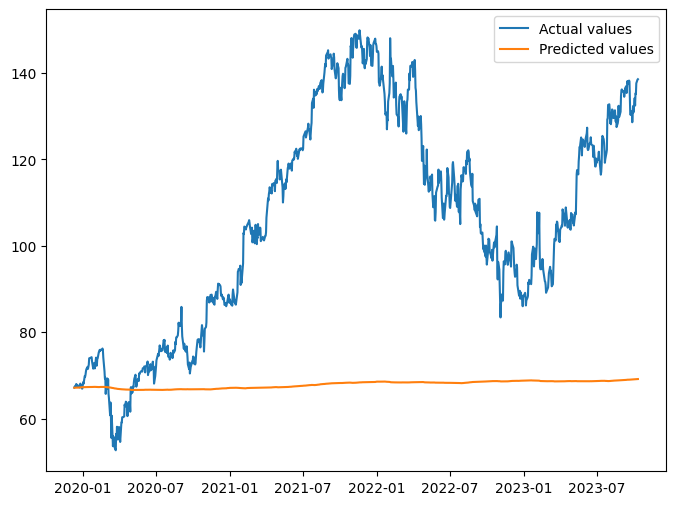

In [57]:
plt.figure(figsize=(8,6))
plt.plot(y_test_ggl.index, np.array(y_test_ggl), label="Actual values")
plt.plot(y_test_ggl.index, y_long_preds, label="Predicted values")
plt.legend()

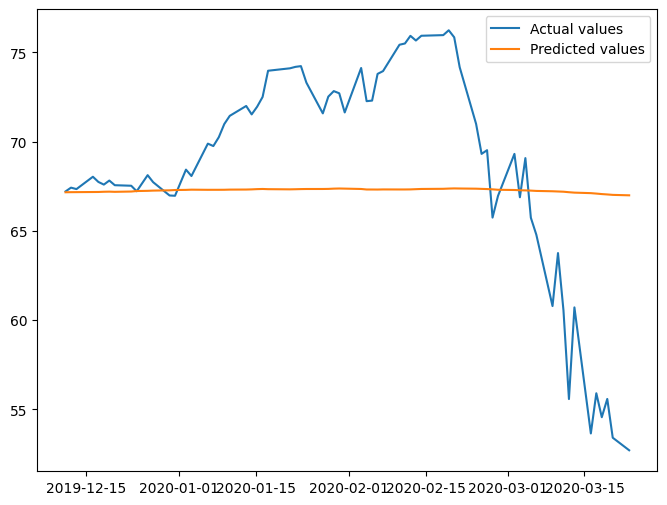

In [59]:
plt.figure(figsize=(8,6))
plt.plot(y_test_ggl.index[:70], np.array(y_test_ggl)[:70], label="Actual values")
plt.plot(y_test_ggl.index[:70], y_long_preds[:70], label="Predicted values")
plt.legend()

As we can see, linear model started to fail when critical tendencies started to occur. And this is why linear regression is too general for this kind of task.

MAE for linear regression: 2.2005983205893855
R2 score: 0.9985854170634901


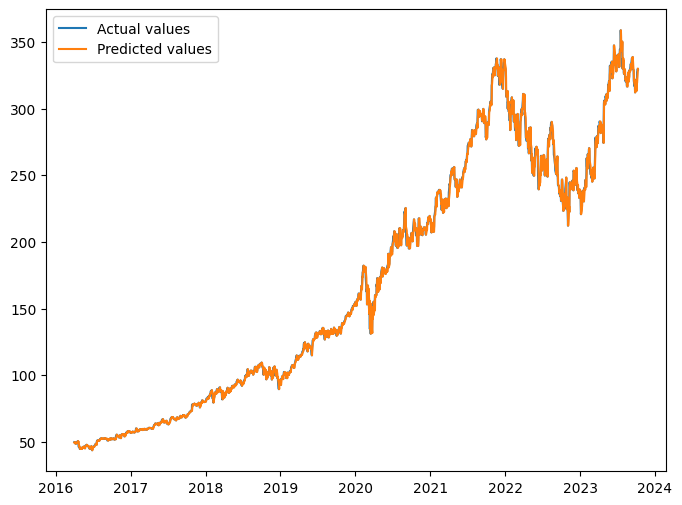

In [60]:
model_msft = LinearRegression()
model_msft.fit(X_train_msft, y_train_msft)
y_pred = model_msft.predict(X_test_msft)

print(f'MAE for linear regression: {mean_absolute_error(y_test_msft, y_pred)}\n\
R2 score: {r2_score(y_test_msft, y_pred)}')

plt.figure(figsize=(8,6))
plt.plot(y_test_msft.index, np.array(y_test_msft), label="Actual values")
plt.plot(y_test_msft.index, y_pred, label="Predicted values")
plt.legend()

d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names

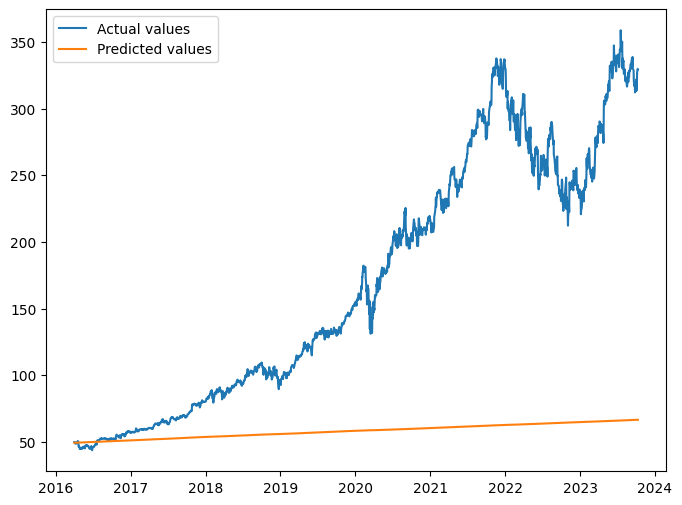

In [63]:
long_time_preds = pd.DataFrame(data={
    'volume': X_test_msft.volume.tolist(),
    'prev_price': [np.NAN for _ in range(len(X_test_msft))]
})
long_time_preds['prev_price'][0] = X_train_msft.iloc[-1, 1]
y_long_preds = []

for index, row in long_time_preds.iterrows():
    if index != 0:
        row['prev_price'] = y_long_preds[-1]
    y_long_preds.append(model_msft.predict([[row['volume'], row['prev_price']]])[0])

plt.figure(figsize=(8,6))
plt.plot(y_test_msft.index, np.array(y_test_msft), label="Actual values")
plt.plot(y_test_msft.index, y_long_preds, label="Predicted values")
plt.legend()

And the same goes for Microsoft.

### ARIMA (AutoRegressive Integrated Moving Average)

In [ ]:
data_ggl.drop(['volume', 'prev_price'], axis=1, inplace=True)
data_msft.drop(['volume', 'prev_price'], axis=1, inplace=True)

To create a propper ARIMA model we need to choose several parameters that will fit best for this time series.

This parameters are:
- __p__ - the number of lagged (or past) observations to consider for autoregression.
- __d__ - the number of times the raw observations are differenced.
- __q__ - the size of the moving average window.

The first parameter that we want to determine is __d__ that is responsible for a number of differences we should do before our data will become stationary. The simplest way to do this is to plot a autocorrelation chart and then differ the data until this chart will look good for our purposes

Both __d__ and __q__ can be determined by looking at the autocorrelation plots

P-value for rejecting the null hypothesis that our data is non-stationary: 0.9961488339706411


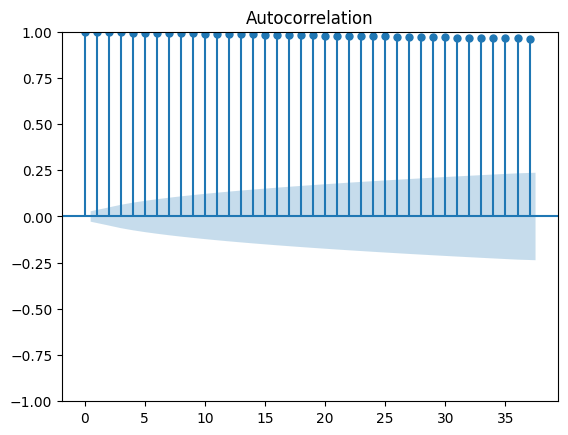

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

plot_acf(data_ggl.target_price);
print(f'P-value for rejecting the null hypothesis that our data is non-stationary: {adfuller(data_ggl.target_price)[1]}')

We can see that this series is clearly non-stationary which means that it has some trends. This is not suitable for ARIMA and this is why we need to differ this data until we get stationaty time series.

In [110]:
def find_d(series):
    series = series.copy()

    d = 0
    while adfuller(series.target_price)[1] > 0.05:
        series.target_price = np.array(series.target_price.diff())
        series.dropna(inplace=True)
        d += 1
    return d

In [124]:
print(f'd, q parameter for Google data: {find_d(data_ggl)}\n\
d, q parameter for Microsoft data: {find_d(data_msft)}')

d, q parameter for Google data: 1
d, q parameter for Microsoft data: 1


From this we can conclude that one differ is enough to get to the stationary time series in this case

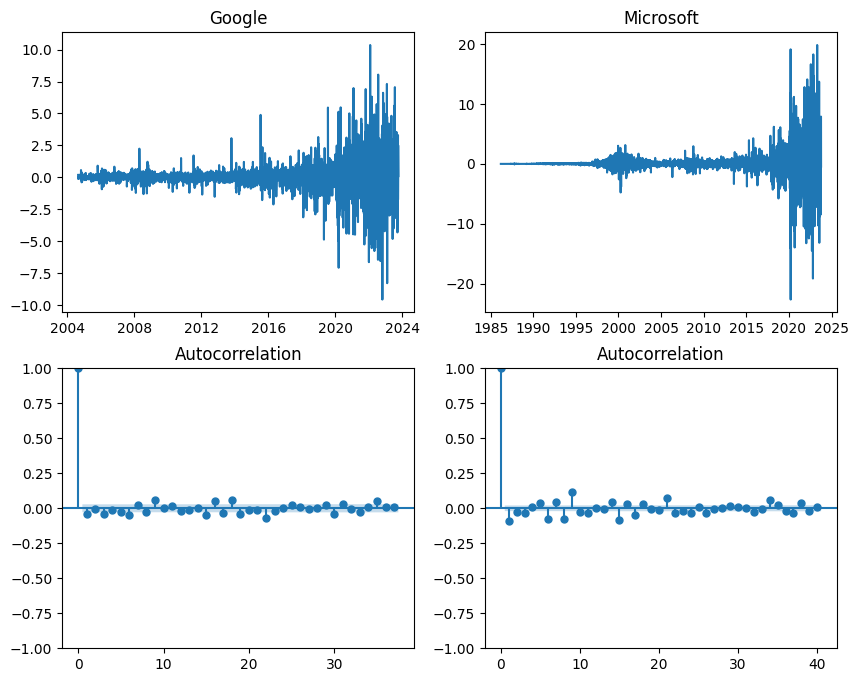

In [120]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax1.set_title("Google")
ax1.plot(data_ggl.index, data_ggl.target_price.diff())


ax2 = fig.add_subplot(222)
ax2.set_title("Microsoft")
ax2.plot(data_msft.index, data_msft.target_price.diff())

ax2 = fig.add_subplot(223)
plot_acf(data_ggl.target_price.diff().dropna(), ax=ax2);

ax3 = fig.add_subplot(224)
plot_acf(data_msft.target_price.diff().dropna(), ax=ax3);

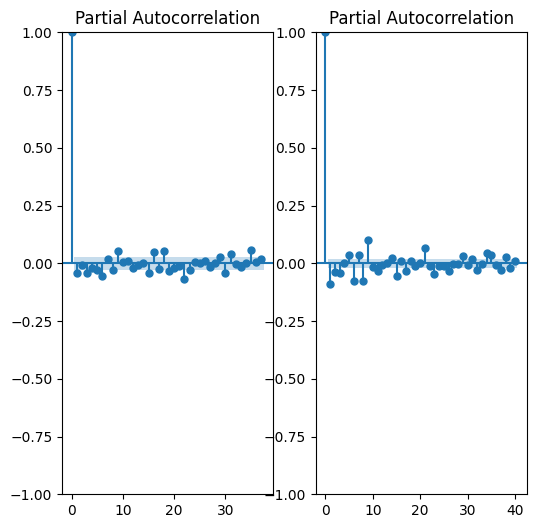

In [127]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(121)
ax1.set_title('Google')
plot_pacf(data_ggl.diff().dropna(), ax=ax1);

ax2 = fig.add_subplot(122)
ax2.set_title('Microsoft')
plot_pacf(data_msft.diff().dropna(), ax=ax2);

We determine __p__ based on the most significant lag in the partial autocorrelation plot. We can clearly see that first lag is the most significant in both cases.

In [175]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

arima_ggl = sm.tsa.arima.ARIMA(data_ggl.iloc[:len(data_ggl)-10].target_price, order=(1,1,1)).fit()
arima_msft = sm.tsa.arima.ARIMA(data_msft.iloc[:len(data_msft)-10].target_price, order=(1,1,1)).fit()

d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Coding\DataScience\Projects\StockPricesPrediction\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. 

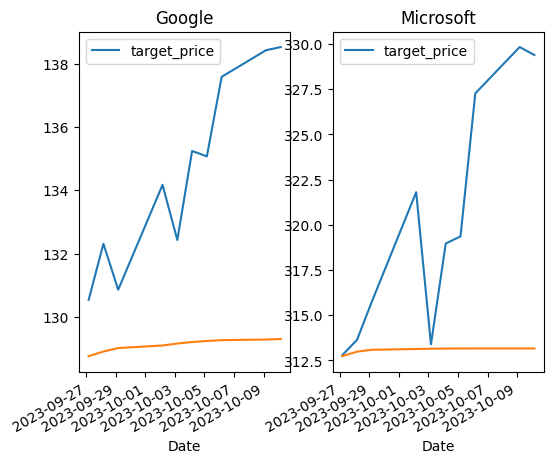

In [176]:
from statsmodels.graphics.tsaplots import plot_predict

fig = plt.figure(figsize=(6,5))

ax1 = fig.add_subplot(121)
ax1.set_title("Google")
data_ggl.iloc[len(data_ggl)-10:].plot(ax=ax1)
y_pred = np.array(arima_ggl.forecast(10))
ax1.plot(data_ggl.index[len(data_ggl)-10:], y_pred)

ax2 = fig.add_subplot(122)
ax2.set_title("Microsoft")
data_msft.iloc[len(data_msft)-10:].plot(ax=ax2)
y_pred = np.array(arima_msft.forecast(10))
ax2.plot(data_msft.index[len(data_msft)-10:], y_pred)

#### Plot train series

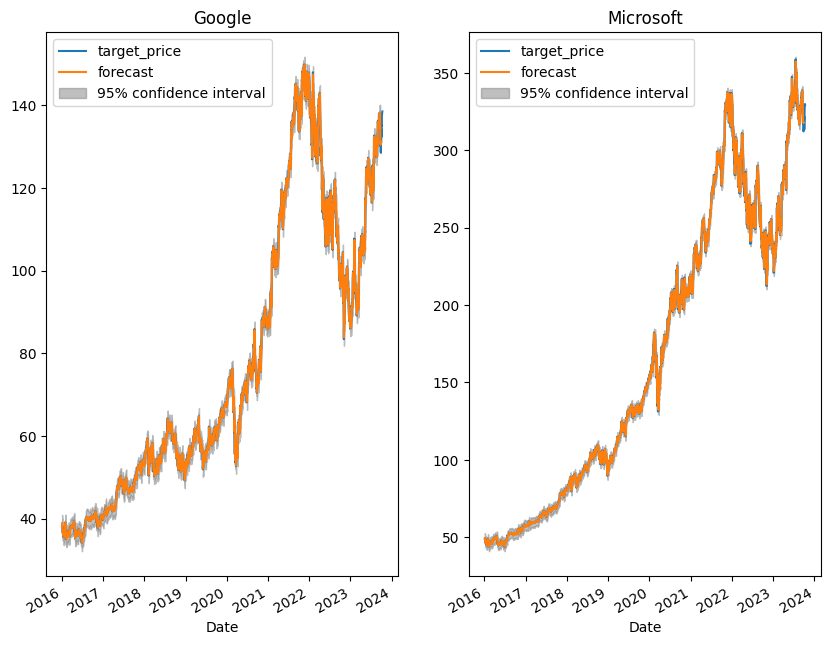

In [177]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(121)
ax1.set_title("Google")
data_ggl.loc['2016':].plot(ax=ax1)
plot_predict(arima_ggl, '2016', ax=ax1);

ax2 = fig.add_subplot(122)
ax2.set_title("Microsoft")
data_msft.loc['2016':].plot(ax=ax2)
plot_predict(arima_msft, '2016', ax=ax2);

To make a conclusion I can say that ARIMA models are better than the simple linear approach, but it still can catch only the general tendencies (relying on the 95% confidence interval) and only on the small period of time.

### LSTM neural network for predicting time series

In [53]:
import torch
import torch.utils.data as data
from torch import nn
from torch import optim

In [110]:
train_size_ggl = int(len(data_ggl) * .9)
train_size_msft = int(len(data_msft) * .95)

test_size_ggl = len(data_ggl) - train_size_ggl
test_size_msft = len(data_msft) - train_size_msft

In [21]:
train_size_ggl, test_size_ggl

(4337, 482)

In [111]:
test_size_ggl, test_size_msft

(482, 474)

To make these datasets good inputs for LSTM we need to split each of them on the features and targets, where we use some N previous prices to predict the next day value.  

In [112]:
def split_dataset(dataset, lookback):
    X, y = [], []

    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [164]:
train_ggl, test_ggl = data_ggl[:train_size_ggl].values.astype('float32'), data_ggl[train_size_ggl:].values.astype('float32')
train_msft, test_msft = data_msft[:train_size_msft].values.astype('float32'), data_msft[train_size_msft:].values.astype('float32')

In [165]:
lookback = 4
X_train_ggl, y_train_ggl = split_dataset(train_ggl, lookback=lookback)
X_test_ggl, y_test_ggl = split_dataset(test_ggl, lookback=lookback)

In [166]:
X_train_msft, y_train_msft = split_dataset(train_msft, lookback=lookback)
X_test_msft, y_test_msft = split_dataset(test_msft, lookback=lookback)

In [116]:
class StockPredictBase(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.fc = nn.Linear(50, 1)
    
    def forward(self, x):
        x, _ = self.lstm(x)
        return self.fc(x)

In [61]:
def train(model, X_train, y_train, X_test, y_test, optimizer, loss_fn, n_epochs, batch_size):
    train_losses = []
    test_losses = []
    for epoch in range(n_epochs):
        model.train()
        loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=batch_size)
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss_train = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
        
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            loss_test = loss_fn(y_pred, y_test)

        train_losses.append(loss_train.item())
        test_losses.append(loss_test.item())
        print(f'Epoch {epoch+1}/{n_epochs}: train RMSE = {np.sqrt(loss_train.item())}, test RMSE = {np.sqrt(loss_test.item())}')
    return train_losses, test_losses

In [98]:
model = StockPredictBase()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
n_epochs = 1000

train_losses, test_losses = train(model, X_train_ggl, y_train_ggl, X_test_ggl, y_test_ggl, optimizer, loss_fn, n_epochs=n_epochs, batch_size=100)

Epoch 1/1000: train RMSE = 49.56601451520866, test RMSE = 108.88870464837021
Epoch 2/1000: train RMSE = 36.77800405175966, test RMSE = 100.32008830332786
Epoch 3/1000: train RMSE = 30.792322326479574, test RMSE = 92.35247949432652
Epoch 4/1000: train RMSE = 23.06399126064467, test RMSE = 83.9995000915184
Epoch 5/1000: train RMSE = 10.54769455727804, test RMSE = 76.64581563717292
Epoch 6/1000: train RMSE = 26.750708454768656, test RMSE = 70.44546802203638
Epoch 7/1000: train RMSE = 20.48365690484276, test RMSE = 65.00340661145191
Epoch 8/1000: train RMSE = 15.308882305426685, test RMSE = 60.45180843099836
Epoch 9/1000: train RMSE = 9.328765796012647, test RMSE = 56.5254173158799
Epoch 10/1000: train RMSE = 4.530906927341205, test RMSE = 52.883956835934654
Epoch 11/1000: train RMSE = 15.796114306146672, test RMSE = 49.66564230321224
Epoch 12/1000: train RMSE = 12.583345796355756, test RMSE = 46.59813810238962
Epoch 13/1000: train RMSE = 16.24961782152747, test RMSE = 43.77376586638394
Ep

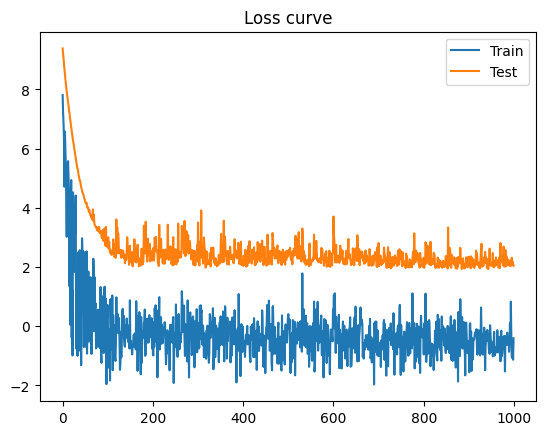

In [99]:
plt.title('Loss curve')
plt.plot(range(n_epochs), np.log(train_losses), label='Train')
plt.plot(range(n_epochs), np.log(test_losses), label='Test')
plt.legend()

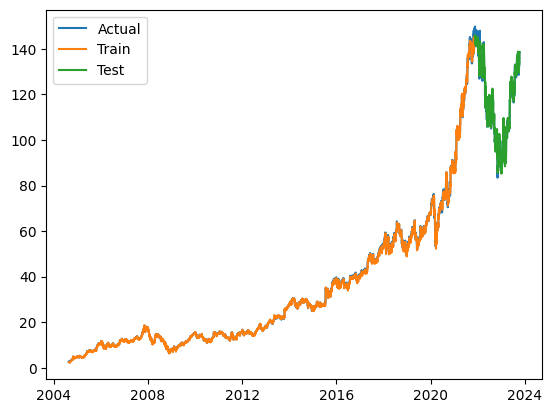

In [100]:
with torch.no_grad():
    # Train plot
    train_plot = np.ones_like(data_ggl) * np.nan
    y_pred = model(X_train_ggl)[:, -1, :] # Since our model has an output of 4 values we need to take just the last one as the final prediction
    train_plot[lookback:train_size_ggl] = y_pred

    # Test plot
    test_plot = np.ones_like(data_ggl) * np.nan
    y_pred = model(X_test_ggl)[:, -1, :]
    test_plot[train_size_ggl+lookback:] = y_pred
plt.plot(data_ggl.index, data_ggl, label='Actual')
plt.plot(data_ggl.index, train_plot, label="Train")
plt.plot(data_ggl.index, test_plot, label="Test")
plt.legend()

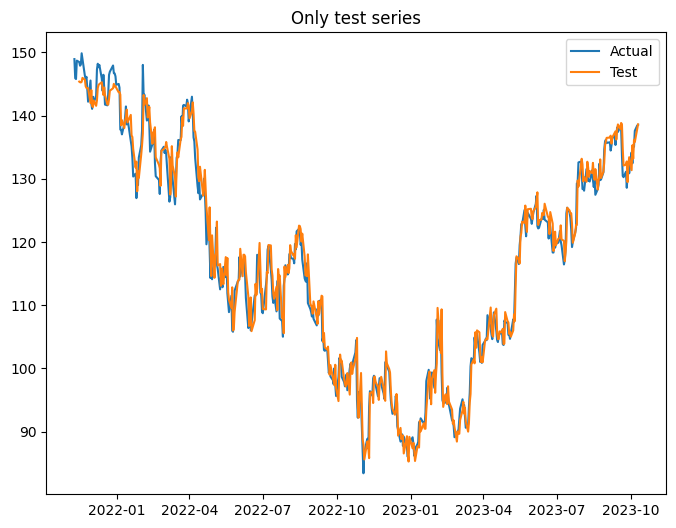

In [101]:
plt.figure(figsize=(8,6))
plt.title('Only test series')
plt.plot(data_ggl.index[train_size_ggl:], data_ggl[train_size_ggl:], label='Actual')
plt.plot(data_ggl.index[train_size_ggl:], test_plot[train_size_ggl:], label="Test")
plt.legend()

And let's train the same model for Microsoft

In [118]:
model_msft = StockPredictBase()
optimizer = optim.Adam(model_msft.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
n_epochs = 1500

train_losses, test_losses = train(model_msft, X_train_msft, y_train_msft, X_test_msft, y_test_msft, optimizer, loss_fn, n_epochs=n_epochs, batch_size=100)

Epoch 1/1500: train RMSE = 67.04138545168388, test RMSE = 253.18227747020524
Epoch 2/1500: train RMSE = 29.282201533698867, test RMSE = 224.30637878245906
Epoch 3/1500: train RMSE = 38.25089676746971, test RMSE = 200.53938983401738
Epoch 4/1500: train RMSE = 14.307647282203776, test RMSE = 181.06998603785775
Epoch 5/1500: train RMSE = 29.876318738872744, test RMSE = 163.80672920014612
Epoch 6/1500: train RMSE = 25.833181598176694, test RMSE = 148.80310895399666
Epoch 7/1500: train RMSE = 18.387694249271373, test RMSE = 134.36306633055827
Epoch 8/1500: train RMSE = 23.276572516695836, test RMSE = 121.58412002472815
Epoch 9/1500: train RMSE = 12.51388328139085, test RMSE = 110.48511636188832
Epoch 10/1500: train RMSE = 20.53327808785541, test RMSE = 101.1935992602793
Epoch 11/1500: train RMSE = 21.772468975140082, test RMSE = 93.15287439372175
Epoch 12/1500: train RMSE = 6.660961793751881, test RMSE = 85.93733238620018
Epoch 13/1500: train RMSE = 7.760532482400959, test RMSE = 79.0704170

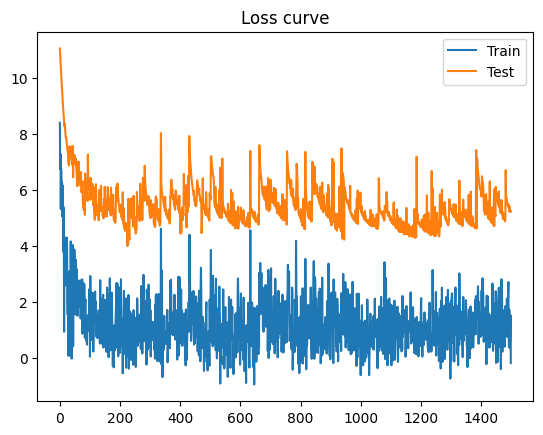

In [119]:
plt.title('Loss curve')
plt.plot(range(n_epochs), np.log(train_losses), label='Train')
plt.plot(range(n_epochs), np.log(test_losses), label='Test')
plt.legend()

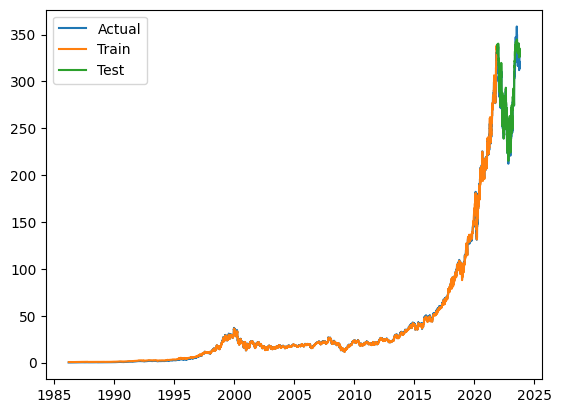

In [121]:
with torch.no_grad():
    # Train plot
    train_plot = np.ones_like(data_msft) * np.nan
    y_pred = model_msft(X_train_msft)[:, -1, :] # Since our model has an output of 4 values we need to take just the last one as the final prediction
    train_plot[lookback:train_size_msft] = y_pred

    # Test plot
    test_plot = np.ones_like(data_msft) * np.nan
    y_pred = model_msft(X_test_msft)[:, -1, :]
    test_plot[train_size_msft+lookback:] = y_pred
plt.plot(data_msft.index, data_msft, label='Actual')
plt.plot(data_msft.index, train_plot, label="Train")
plt.plot(data_msft.index, test_plot, label="Test")
plt.legend()

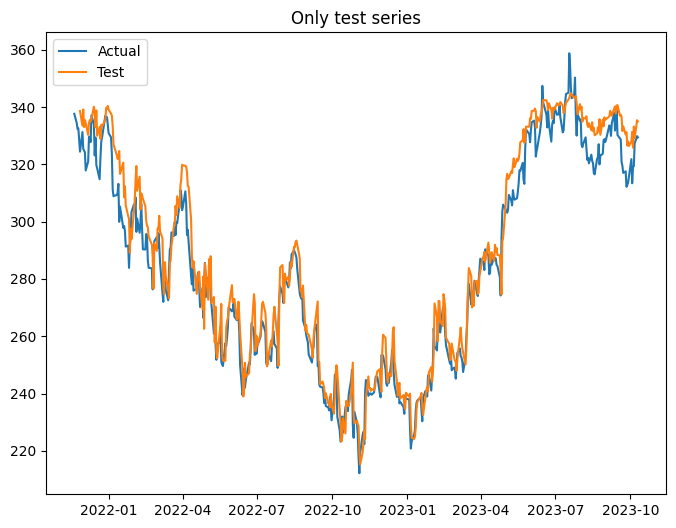

In [124]:
plt.figure(figsize=(8,6))
plt.title('Only test series')
plt.plot(data_msft.index[train_size_msft:], data_msft[train_size_msft:], label='Actual')
plt.plot(data_msft.index[train_size_msft:], test_plot[train_size_msft:], label="Test")
plt.legend()

From the research above I can conclude that LSTM neural network performs better than others, so it's time to use it for future prediction.

### Future prediction using Neural Network

#### Microsoft

In [249]:
from copy import deepcopy

last_lookback_msft = deepcopy(X_test_msft[-1])

In [ ]:
future_preds_msft = []
with torch.no_grad():
    model_msft.eval()
    for i in range(20):
        y_pred = model_msft(last_lookback_msft)[-1].item()
        last_lookback_msft = last_lookback_msft[-3:]
        last_lookback_msft = torch.cat((last_lookback_msft, torch.tensor([[y_pred]])))

        future_preds_msft.append(y_pred)

In [267]:
import datetime

next_date = data_msft.index[-1].to_pydatetime() + datetime.timedelta(days=1)
new_dates = [next_date]
for _ in range(19):
    next_date = next_date + datetime.timedelta(days=1)
    new_dates.append(next_date)

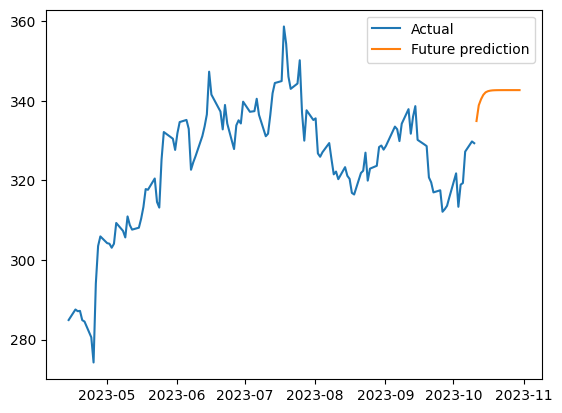

In [278]:
plt.plot(data_msft.index[train_size_msft+350:], data_msft[train_size_msft+350:], label='Actual')
plt.plot(new_dates, future_preds_msft, label="Future prediction")
plt.legend()

#### Google

In [272]:
from copy import deepcopy

last_lookback_ggl = deepcopy(X_test_ggl[-1])

future_preds_ggl = []
with torch.no_grad():
    model.eval()
    for i in range(20):
        y_pred = model(last_lookback_ggl)[-1].item()
        last_lookback_ggl = last_lookback_ggl[-3:]
        last_lookback_ggl = torch.cat((last_lookback_ggl, torch.tensor([[y_pred]])))

        future_preds_ggl.append(y_pred)

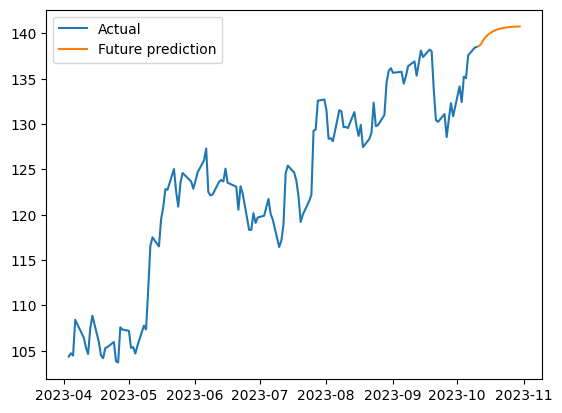

In [280]:
plt.plot(data_ggl.index[train_size_ggl+350:], data_ggl[train_size_ggl+350:], label='Actual')
plt.plot(new_dates, future_preds_ggl, label="Future prediction")
plt.legend()

### Conclusions

To make a conclusion, I can say that the LSTM neural network performs the best in the long periods of time, so if we need a long-time prediction (like 20 days in my example), we should use LSTM. But also important to notice that the basic linear regression also performs well if we need to predict tomorow's price based on today's value. ARIMA and autoregression models are too general in my opinion and can't see sharp trends (which NN actually tries to catch), so I'll use the LSTM model as my final solution.